<a href="https://colab.research.google.com/github/szyxxx/MachineLearning-TelkomUniversity/blob/main/AxelDavid_1103210017_TK4504_LogisticRegression_Diabates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [10]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')

url = "/content/diabetes.csv"
diabetes_data = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
X = diabetes_data.drop('Age', axis=1).values
y = diabetes_data['Age'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [17]:
train_pred = model.predict(X_train_poly)
test_pred = model.predict(X_test_poly)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 10.561915603765273
Test RMSE: 16.53813853857627


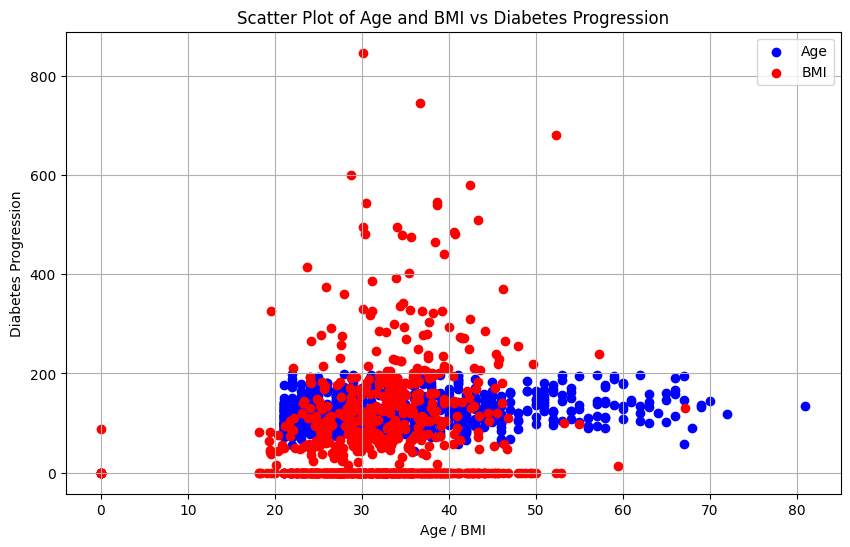

In [18]:
plt.figure(figsize=(10, 6))

# Plot kolom 'age' vs 'Glucose'
plt.scatter(diabetes_data['Age'], diabetes_data['Glucose'], color='blue', label='Age')

# Plot kolom 'BMI' vs 'Insulin'
plt.scatter(diabetes_data['BMI'], diabetes_data['Insulin'], color='red', label='BMI')

plt.title('Scatter Plot of Age and BMI vs Diabetes Progression')
plt.xlabel('Age / BMI')
plt.ylabel('Diabetes Progression')
plt.legend()
plt.grid(True)
plt.show()

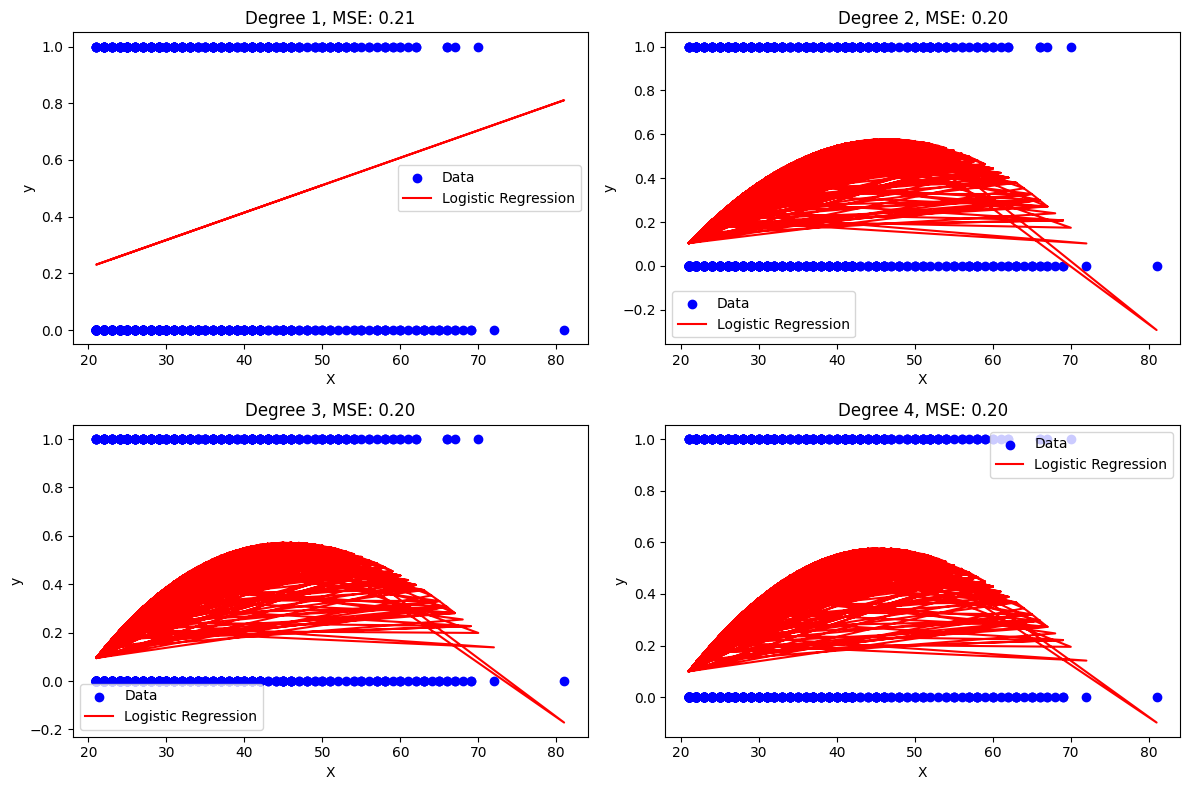

Degree 1, MSE: 0.21
Degree 2, MSE: 0.20
Degree 3, MSE: 0.20
Degree 4, MSE: 0.20


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Fungsi untuk membuat derajat polinomial
def logistic_regression_plot(X, y, degree, subplot_index, mse_list):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)

    plt.subplot(2, 2, subplot_index)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Logistic Regression')
    plt.title(f'Degree {degree}, MSE: {mse:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

# Contoh penggunaan dengan dataset tertentu (misalnya 'age' sebagai fitur)
X = diabetes_data['Age'].values.reshape(-1, 1)
y = diabetes_data['Outcome'].values

# Derajat polinomial yang akan diuji
degrees = [1, 2, 3, 4]

# Inisialisasi list untuk menyimpan MSE
mse_list = []

# Menampilkan scatter plot untuk setiap derajat polinomial dalam subplot 2x2
plt.figure(figsize=(12, 8))
subplot_index = 1
for degree in degrees:
    logistic_regression_plot(X, y, degree, subplot_index, mse_list)
    subplot_index += 1

plt.tight_layout()
plt.show()

# Menampilkan MSE untuk setiap derajat polinomial
for i, degree in enumerate(degrees):
    print(f'Degree {degree}, MSE: {mse_list[i]:.2f}')
